## Import the necessary packages

In [2]:
import csv
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action='ignore')

from gensim.models import Word2Vec

import re
from nltk.stem.api import StemmerI
from nltk.stem.porter import *
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:

csv_file = r'minerva_university_responses.csv'
txt_file = r'mu_responses_txt.txt'

with open(txt_file, "w", encoding="utf8") as my_output_file:
    with open(csv_file, "r", encoding="utf8") as my_input_file:
        [my_output_file.write(" ".join(row)+'\n') for row in csv.reader(x.replace('\0', '') for x in my_input_file)]
    my_output_file.close()


## Clean and preprocess the data

In [ ]:
pd.set_option('display.max_colwidth', 100)
responses = pd.read_csv('minerva_university_responses.csv', encoding='latin-1')
responses.head()


In [ ]:
responses.dropna(subset = ['Poll Responses Response'], inplace=True)
responses['text_clean'] = responses['Poll Responses Response'].apply(lambda x: gensim.utils.simple_preprocess(x))
responses.head()

## Apply different models

In [4]:


sample = open("mu_responses_txt.txt", encoding="utf8")
s = sample.read()
f = s.replace("\n", " ")
data = []
for i in sent_tokenize(f):
    temp = []

    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())

    data.append(temp)
    
print(data)

# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, window=5)
print("Cosine similarity between 'alice' " +
               "and 'wonderland' - CBOW : ",
    model1.wv.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " +
      "and 'machines' - CBOW : ",
      model1.wv.similarity('alice', 'machines'))

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size=100,
                                window=5, sg=1)

# Print results
print("Cosine similarity between 'network' " +
      "and 'node' - Skip Gram : ",
      model2.wv.similarity('network', 'node'))

print("Cosine similarity between 'network' " +
      "and 'system' - Skip Gram : ",
      model2.wv.similarity('network', 'system'))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.62648696
Cosine similarity between 'alice' and 'machines' - CBOW :  -0.002344959


KeyboardInterrupt: 

In [ ]:
# Encoding the label column
responses['Assessment reports Score']=responses['Assessment reports Score'].map({0:'N/A',1:'contains_nothing',2:'contains_some',3:'contains_enough',4:'contains_more_than_enough',5:'woof'})
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(responses['text_clean'], responses['Assessment reports Score'] , test_size=0.2)

In [ ]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

In [ ]:
w2v_model.wv.index_to_key

In [ ]:
# Find the most similar words to "king" based on word vectors from our trained model
w2v_model.wv.most_similar('systemdynamics')

In [15]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import re
from spacy.lang.en.stop_words import STOP_WORDS
from gensim.models.phrases import Phrases, Phraser


In [ ]:
def get_sentences(input_file_pointer):
    while True:
        line = input_file_pointer.readline()
        if not line:
            break

        yield line

In [ ]:
def clean_sentence(sentence):
    sentence = sentence.lower().strip()
    sentence = re.sub(r’[^a-z0-9\s]’, '’, sentence)
    return re.sub(r’\s{2,}’, ' ', sentence)
                      
def tokenize(sentence):
    return [token for token in sentence.split() if token not in STOP_WORDS]
                      
def build_phrases(sentences):
    phrases = Phrases(sentences,
                      min_count=5,
                      threshold=7,
                      progress_per=1000)
    return Phraser(phrases)

                      

In [ ]:
phrases_model.save('phrases_model.txt')
phrases_model= Phraser.load('phrases_model.txt')

In [ ]:
def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

In [ ]:
def sentences_to_bi_grams(n_grams, input_file_name, output_file_name):
    with open(input_file_name, 'r') as input_file_pointer:
        with open(output_file_name, 'w+') as out_file:
            for sentence in get_sentences(input_file_pointer):
                cleaned_sentence = clean_sentence(sentence)
                tokenized_sentence = tokenize(cleaned_sentence)
                parsed_sentence = sentence_to_bi_grams(n_grams, tokenized_sentence)
                out_file.write(parsed_sentence + '\n')

In [3]:
df = pd.read_csv('minerva_university_responses.csv')
df.dropna(subset = ['Poll Responses Response'], inplace=True)

df.head(10)

,id,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score
0,1,12522.0,41.0,The strengths of Plato's approach is his const...,#objectivemorality,2.0
1,2,12522.0,42.0,Having a difficulty with his Divided Line. Th...,#deductivearg,2.0
2,3,12522.0,44.0,"How can one know if he's in the cave or not, i...",#objectivemorality,3.0
3,4,12522.0,237.0,S: the hierarchy of the chart we filled out at...,#objectivemorality,3.0
4,5,12522.0,239.0,It is difficult to grasp how to apply Plato's ...,#objectivemorality,3.0
5,6,12522.0,243.0,Strenght: Plato does provide a framework for p...,#deductivearg,3.0
6,7,12522.0,253.0,We were arguing in my breakout about how we ca...,#justificationmethods,4.0
7,8,12522.0,272.0,"We neologised the term ""caveception"", meaning ...",#objectivemorality,3.0
8,9,12522.0,278.0,Breakout group - Xiaoning claimed that we are ...,#objectivemorality,3.0
9,10,12522.0,288.0,The most difficlut for me to grasp is how educ...,#deductivearg,3.0


In [7]:
df = df.iloc[:5000]
df.shape


(5000, 6)

In [8]:
df.index = range(5000)
df['Poll Responses Response'].apply(lambda x: len(x.split(' '))).sum()

275816

C:\Users\Polin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


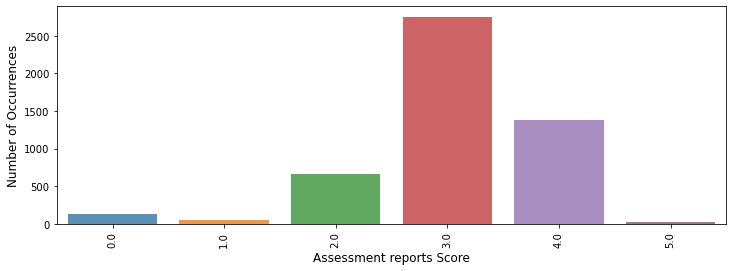

In [9]:
cnt_pro = df['Assessment reports Score'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Assessment reports Score', fontsize=12)
plt.xticks(rotation=90)
plt.show()

C:\Users\Polin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


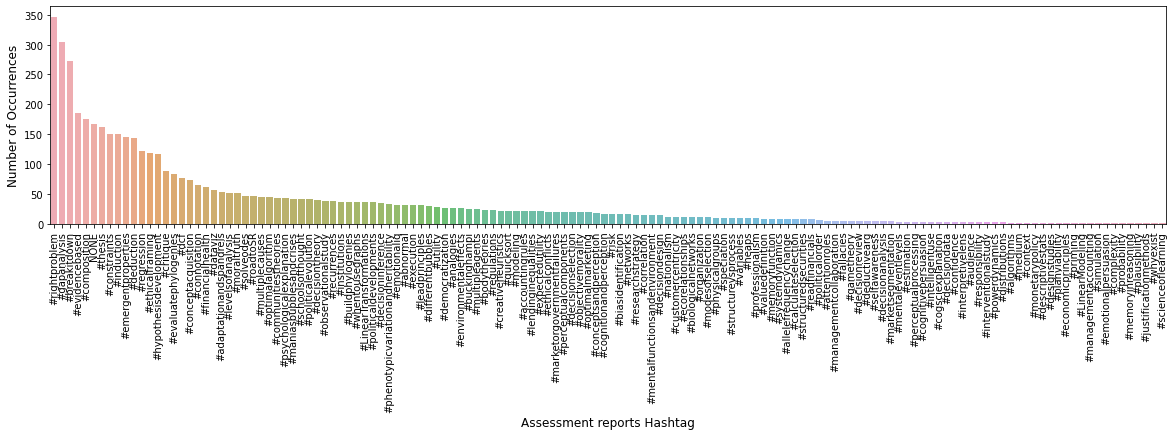

In [10]:
cnt_pro = df['Assessment reports Hashtag'].value_counts()
plt.figure(figsize=(20,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Assessment reports Hashtag', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [11]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Poll Responses Response'] = df['Poll Responses Response'].apply(cleanText)

In [ ]:
# new df START from here

In [12]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

import nltk
from nltk.corpus import stopwords

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Poll Responses Response']), tags=[r['Assessment reports Hashtag']]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Poll Responses Response']), tags=[r['Assessment reports Hashtag']]), axis=1)


In [13]:
train_tagged.values[30]


TaggedDocument(words=['top-down', 'processing', 'drives', 'voluntary', 'attention', 'and', 'bottom-up', 'processing', 'drives', 'involuntary', 'attention'], tags=['#cognitionandperception'])

In [14]:
import multiprocessing
cores = multiprocessing.cpu_count()


In [17]:
model_dbow = Doc2Vec(dm=0, vector_size=120, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|█████████████████████████████████████████████████████████████████████████| 3500/3500 [00:00<00:00, 1716565.01it/s]


In [18]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|█████████████████████████████████████████████████████████████████████████| 3500/3500 [00:00<00:00, 2378108.54it/s]

Wall time: 5.72 s


In [19]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors


In [20]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
#model = LogisticRegression()

logreg = LogisticRegression(n_jobs=1, C=1e5, solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.048
Testing F1 score: 0.049910654423655706


In [22]:
# Initially, this model converted the data into a vector and then tried to predict the score from the vector.
# Now, it tries to predict the HC/LO
# What I want to test though, is how well the model makes itself a vector.

In [23]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=120, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████████████████████████████████████████████| 3500/3500 [00:00<00:00, 869105.68it/s]


In [24]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha


100%|█████████████████████████████████████████████████████████████████████████| 3500/3500 [00:00<00:00, 1737491.30it/s]


Wall time: 11.4 s


In [25]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.06866666666666667
Testing F1 score: 0.05381049468418004


In [47]:

model_dmm.save("d2v.model")

similar_doc = model_dmm.dv.most_similar('#professionalism')
print(similar_doc)

# POtentially SOMEHOW checking which HC the answer is tagging

[('#observationalstudy', 0.7202430963516235), ('#rightproblem', 0.6774994134902954), ('#hypothesisdevelopment', 0.6586576104164124), ('#analogies', 0.6063302159309387), ('#creativeheuristics', 0.6045189499855042), ('#constraints', 0.5685933232307434), ('#breakitdown', 0.567337155342102), ('#audience', 0.5616141557693481), ('#dataviz', 0.5551997423171997), ('#gapanalysis', 0.5504807829856873)]


In [26]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

AttributeError: 'Doc2Vec' object has no attribute 'delete_temporary_training_data'

In [28]:
!pip install testfixtures

In [30]:

from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [33]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [34]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.12066666666666667
Testing F1 score: 0.11834742617901531


In [2]:
# # Separating the dataframe by HCs/LOs and grades
# import pandas as pd

# df = pd.read_csv('minerva_university_responses.csv')


# # Get all HCs/LOs list
# hclo_lst = df['Assessment reports Hashtag'].dropna().unique().tolist()

# # Make a dataframe for each HC/LO
# hclos_dfs = {}
# for hclo in hclo_lst:
#     hclos_dfs[hclo] = df.loc[df['Assessment reports Hashtag'] == hclo]
    
# hclos_dfs['#networks'].head()


# # Make dataframes for each score of each HC/LO
# hclos_scores_dfs = {}

# for hclo in hclo_lst:
#     cur_df = hclos_dfs[hclo]
#     hclos_scores_dfs[f'{hclo}_4'] = cur_df.loc[cur_df['Assessment reports Score'] == 4.0]
#     hclos_scores_dfs[f'{hclo}_3'] = cur_df.loc[cur_df['Assessment reports Score'] == 3.0]
#     hclos_scores_dfs[f'{hclo}_2'] = cur_df.loc[cur_df['Assessment reports Score'] == 2.0]
#     hclos_scores_dfs[f'{hclo}_1'] = cur_df.loc[cur_df['Assessment reports Score'] == 1.0]
    

# hclos_scores_dfs['#networks_4'].head()




,id,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score
3207,3208,31079.0,247.0,#networks 2 for the first reading (Winners Don...,#networks,4.0
3570,3571,33262.0,246.0,One positive outcome is that we started to rea...,#networks,4.0
3578,3579,33262.0,335.0,this crisis made it clear how globally interco...,#networks,4.0
3594,3595,33267.0,260.0,One of the negative outcomes is huge unemplyem...,#networks,4.0
3597,3598,33267.0,283.0,The financial crisis triggered bank runs and b...,#networks,4.0


In [4]:

# Separating the dataframe by HCs/LOs and grades
import pandas as pd

# With underscores
df = pd.read_csv('minerva_university_responses.csv')
df['Poll Responses Response'] = df['Poll Responses Response'].replace(' ', '_', regex=True)


# Get all HCs/LOs list
hclo_lst = df['Assessment reports Hashtag'].dropna().unique().tolist()

# Make a dataframe for each HC/LO
hclos_dfs = {}
for hclo in hclo_lst:
    hclos_dfs[hclo] = df.loc[df['Assessment reports Hashtag'] == hclo]
    
hclos_dfs['#networks'].head()


# Make dataframes for each score of each HC/LO
hclos_scores_dfs = {}

for hclo in hclo_lst:
    cur_df = hclos_dfs[hclo]
    hclos_scores_dfs[f'{hclo}_4'] = cur_df.loc[cur_df['Assessment reports Score'] == 4.0]
    hclos_scores_dfs[f'{hclo}_3'] = cur_df.loc[cur_df['Assessment reports Score'] == 3.0]
    hclos_scores_dfs[f'{hclo}_2'] = cur_df.loc[cur_df['Assessment reports Score'] == 2.0]
    hclos_scores_dfs[f'{hclo}_1'] = cur_df.loc[cur_df['Assessment reports Score'] == 1.0]
    

hclos_scores_dfs['#networks_4'].head()




,id,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score
3207,3208,31079.0,247.0,#networks_2_for_the_first_reading_(Winners_Don...,#networks,4.0
3570,3571,33262.0,246.0,One_positive_outcome_is_that_we_started_to_rea...,#networks,4.0
3578,3579,33262.0,335.0,this_crisis_made_it_clear_how_globally_interco...,#networks,4.0
3594,3595,33267.0,260.0,One_of_the_negative_outcomes_is_huge_unemplyem...,#networks,4.0
3597,3598,33267.0,283.0,The_financial_crisis_triggered_bank_runs_and_b...,#networks,4.0


^C


In [20]:
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [24]:
df = pd.read_csv('minerva_university_responses.csv',nrows=1000)
df.head()

,id,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score
0,1,12522,41,The strengths of Plato's approach is his const...,#objectivemorality,2
1,2,12522,42,Having a difficulty with his Divided Line. Th...,#deductivearg,2
2,3,12522,44,"How can one know if he's in the cave or not, i...",#objectivemorality,3
3,4,12522,237,S: the hierarchy of the chart we filled out at...,#objectivemorality,3
4,5,12522,239,It is difficult to grasp how to apply Plato's ...,#objectivemorality,3


In [23]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [26]:
data = df['Poll Responses Response'].values.tolist()
type(data)

list

In [27]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [28]:
data_words = list(sent_to_words(data))


In [29]:
print(data_words[3])


['the', 'hierarchy', 'of', 'the', 'chart', 'we', 'filled', 'out', 'at', 'the', 'beginning', 'of', 'class', 'moral', 'knowledge', 'and', 'objectivity', 'is', 'clearly', 'explained', 'but', 'was', 'hard', 'for', 'me', 'to', 'understand', 'at', 'first', 'in', 'reference', 'to', 'the', 'chart', 'plato', 'doesn', 'use', 'the', 'term', 'truth', 'as', 'clearly', 'as', 'he', 'could', 'related', 'to', 'the', 'forms', 'asked', 'this']


In [30]:
from gensim.models.phrases import Phrases, Phraser
# Build the bigram and trigram models
bigram = Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = Phrases(bigram[data_words], threshold=100)

2022-11-11 10:09:16,265 : INFO : collecting all words and their counts
2022-11-11 10:09:16,268 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2022-11-11 10:09:16,335 : INFO : collected 30616 token types (unigram + bigrams) from a corpus of 44790 words and 1000 sentences
2022-11-11 10:09:16,336 : INFO : merged Phrases<30616 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2022-11-11 10:09:16,337 : INFO : Phrases lifecycle event {'msg': 'built Phrases<30616 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.07s', 'datetime': '2022-11-11T10:09:16.337353', 'gensim': '4.2.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2022-11-11 10:09:16,339 : INFO : collecting all words and their counts
2022-11-11 10:09:16,341 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2022-11-11 10:09:16,499 : INFO : collected 30813 token types (unigra

In [31]:
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

2022-11-11 10:09:25,835 : INFO : exporting phrases from Phrases<30616 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2022-11-11 10:09:25,910 : INFO : FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<60 phrases, min_count=5, threshold=100> from Phrases<30616 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.07s', 'datetime': '2022-11-11T10:09:25.910402', 'gensim': '4.2.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2022-11-11 10:09:25,911 : INFO : exporting phrases from Phrases<30813 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
2022-11-11 10:09:26,077 : INFO : FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<63 phrases, min_count=5, threshold=100> from Phrases<30813 vocab, min_count=5, threshold=100, max_vocab_size=40000000> in 0.16s', 'datetime': '2022-11-11T10:09:26.076061', 'gensim': '4.2.0', 'python': '3.8.3 (default, 

In [32]:
print(trigram_mod[bigram_mod[data_words[200]]])


['would', 'look_at', 'how', 'closely', 'each', 'is', 'related', 'to', 'those', 'researched', 'which', 'have', 'proven', 'to', 'be', 'most', 'active', 'in', 'inhibiting', 'ache', 'activity']


In [41]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [44]:
nlp = spacy.load("en_core_web_lg")

data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])


In [46]:
# import pandas as pd
# import numpy as np
# import gensim
# import gensim.corpora as corpora
# from gensim.utils import simple_preprocess
# from gensim.models import CoherenceModel
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis
# import matplotlib.pyplot as plt
# import re
# import spacy

In [49]:
model = gensim.models.Word2Vec(
        data_words,
        window=10,
        min_count=2,
        workers=10)

2022-11-11 10:16:49,825 : INFO : collecting all words and their counts
2022-11-11 10:16:49,825 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-11-11 10:16:49,835 : INFO : collected 4926 word types from a corpus of 44790 raw words and 1000 sentences
2022-11-11 10:16:49,836 : INFO : Creating a fresh vocabulary
2022-11-11 10:16:49,863 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 2546 unique words (51.68% of original 4926, drops 2380)', 'datetime': '2022-11-11T10:16:49.863074', 'gensim': '4.2.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2022-11-11 10:16:49,864 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 42410 word corpus (94.69% of original 44790, drops 2380)', 'datetime': '2022-11-11T10:16:49.864079', 'gensim': '4.2.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]',

In [4]:
import os
import re
import logging
import time
import config

from operator import add

from pyspark import SparkConf, SparkContext, SQLContext
from pyspark.broadcast import _broadcastRegistry

ModuleNotFoundError: No module named 'config'

In [53]:

char_splitter = re.compile("[.,;!:()-]")
def generate_candidate_phrases(text, stopwords):
    """ generate phrases using phrase boundary markers """
    # generate approximate phrases with punctation
    coarse_candidates = char_splitter.split(text.lower())
    candidate_phrases = []
    for coarse_phrase\
            in coarse_candidates:
        words = re.split("\\s+", coarse_phrase)
        previous_stop = False
        # examine each word to determine if it is a phrase boundary marker or part of a phrase or lone ranger
        for w in words:
            if w in stopwords and not previous_stop:
                # phrase boundary encountered, so put a hard indicator
                candidate_phrases.append(";")
                previous_stop = True
            elif w not in stopwords and len(w) > 3:
                # keep adding words to list until a phrase boundary is detected
                candidate_phrases.append(w.strip())
                previous_stop = False
    # get a list of candidate phrases without boundary demarcation
    phrases = re.split(";+", ' '.join(candidate_phrases))
    return phrases


In [17]:
import nltk
from nltk.corpus import stopwords
stops = stopwords.words('english')

from gensim.models import Phrases

In [18]:
import pandas as pd
df = pd.read_csv('minerva_university_responses.csv',nrows=1000)

df.head()

,id,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score
0,1,12522,41,The strengths of Plato's approach is his const...,#objectivemorality,2
1,2,12522,42,Having a difficulty with his Divided Line. Th...,#deductivearg,2
2,3,12522,44,"How can one know if he's in the cave or not, i...",#objectivemorality,3
3,4,12522,237,S: the hierarchy of the chart we filled out at...,#objectivemorality,3
4,5,12522,239,It is difficult to grasp how to apply Plato's ...,#objectivemorality,3


In [8]:
# # df['tokens']=df['Poll Responses Response'].apply(tokenization_function)
# # df['tokens']=df['tokens'].apply(lambda x:[x])
# # df['bigrams']=df['tokens'].apply(bigrams)

# bigram_transformer = Phrases(df['Poll Responses Response'])


In [37]:



# make into list
responses = df['Poll Responses Response'].to_list()
word_list = [word for line in responses for word in line.split()]


# run model on it
phrases = Phrases(word_list, min_count=1, threshold=1)


#df2 = pd.read_csv('minerva_university_responses.csv',nrows=2000)


In [38]:
#responses2 = df2['Poll Responses Response'][1000:2000]
word_list[0]

'The'

In [39]:
#from gensim.models import Phraser
from gensim.models.phrases import Phrases, Phraser

bigram = Phraser(phrases)

responses2 = df2['Poll Responses Response'][1000:2000].to_list()
word_list2 = [word for line in responses2 for word in line.split()]



In [41]:
print(bigram[word_list2])

['I', 'thought', 'that', 'this', 'group', 'used', 'the', 'HC', '#constraints', 'very', 'well.', 'In', 'addition', 'to', 'breaking', 'down', 'the', 'problem', 'and', 'providing', 'a', 'gap', 'analysis', 'of', 'where', 'we', 'are', 'in', 'the', 'environmental', 'degradation', 'problem', 'now', 'to', 'where', 'we', 'need', 'to', 'be', 'in', 'the', 'future', 'to', 'attain', 'more', 'sustainable', 'agriculture', 'practices,', 'they', 'acknowledged', 'several', 'constraints', 'related', 'to', 'the', 'problem,', 'such', 'as', 'dietary', 'preferences,', 'affected', 'by', 'changing', 'crops.', 'I', 'thought', 'the', 'use', 'of', '#constraint', 'in', 'the', 'group', "D's", 'presentation', 'was', 'interesting,', 'as', 'they', 'embedded', 'the', 'constraints', 'into', 'the', 'broken', 'down', 'problem', 'itself.', 'By', 'embedding', 'the', 'constraints', 'in', 'the', 'problems', 'and', 'solutions,', 'they', 'were', 'able', 'to', 'apply', 'constraint', 'satisfaction', 'better', '(ex:', 'understandi

In [3]:
import pandas as pd
import spacy


In [2]:
df = pd.read_csv('minerva_university_responses.csv')
df.dropna(subset = ['Poll Responses Response'], inplace=True)
df_dict = {g: d for g, d in df.groupby('Assessment reports Hashtag')}
rp = df_dict['#rightproblem']


In [4]:
rp_lst = rp['Poll Responses Response'].tolist()


In [5]:
rp_lst[1]

'The group applied #rightproblem very well by making sure the listeners of the speech understand what problem that they are trying to combat- good explanation. I understood the point they were making so maybe I would vote for this politician!'

In [6]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

# Process a text
doc = nlp(rp_lst[1])

# Print the document text
print(doc.text)

The group applied #rightproblem very well by making sure the listeners of the speech understand what problem that they are trying to combat- good explanation. I understood the point they were making so maybe I would vote for this politician!


In [7]:
# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i+1]
        # Check if the next token's text equals '%'
    if token.text == 'by':
        print('Percentage found:', token.text)

Percentage found: by


In [8]:
#lg = spacy.load('en_core_web_lg')
doc = lg(rp_lst[2])
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

NameError: name 'lg' is not defined

In [9]:
big_rp = rp['Poll Responses Response'].sum()

In [10]:
# Import the Matcher and initialize it with the shared vocabulary
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
doc = nlp(big_rp[0:1000000])


In [23]:
#import spacy
nlp = spacy.load("en_core_web_sm")

# move the NER component to the end of the pipeline: remove and then reload from the same source in the new position
#nlp.remove_pipe("ner")
#nlp.add_pipe("ner", source=spacy.load("en_core_web_sm"))

# add entity ruler
#nlp.add_pipe("entity_ruler", before="ner")


In [25]:
print(nlp.pipe_names)


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [29]:

matcher = Matcher(nlp.vocab)


# Create a pattern matching an adjective and then a noun or several nouns after
pattern = [{'POS': 'ADJ'}, {'POS': 'NOUN'}, {'POS': 'NOUN', 'OP': '?'}]

# Add the pattern to the matcher
matcher.add('initial_pattern', [pattern])

# Use the matcher on the doc
matches = matcher(nlp(doc))
print('Matches:', [doc[start:end].text for match_id, start, end in matches][0:100])

Matches: ['good explanation', 'agricultural practices', 'important role', 'bigger picture', 'multiple factors', 'current issues', '#gapanalysis', 'environemtal resources', 'previous group', 'greener planet', 'central issue', 'concise manner', 'emotional manipulative', 'enough food', 'adequate food', 'adequate food outputI', 'main problem', 'clear definition', 'main problem', 'great job', 'more food', 'Good demonstration', 'environmental aspect', 'practical one', 'many people', 'basic knowledge', 'good #', 'tractable parts', 'right problem', 'right track', 'presidential debates', 'right problem', 'right problem', 'baked solution', 'clear understanding', 'wrong problem', 'political soundbite', 'thoughtful soundbite', 'relevant HCs', 'perfect example', 'uneven time', 'uneven time distribute', 'wrong problem', 'particular problem', 'proble needing', 'complex problem', 'ideal situation', 'possible solution', 'right framework', 'right problem', 'high chance', 'right direction', 'wrong proble

In [30]:
nlp.vocab.strings['coffee']

3197928453018144401

In [34]:
rp_rubric = 'Accurately identifies, characterizes and clearly explains the aspects of a problem; (when applicable) identifies likely future consequences of a problem; (when applicable) recognizes and effectively critiques an ineffective approach to a problem; (when applicable) recognizes and effectively corrects an ineffective approach to a problem.'


In [39]:
import re
import string
s = rp_rubric
rp_rubric_lst = re.findall(r"\w+|[^\w\s]", s)
#rp_rubric_lst


In [44]:
from spacy.tokens import Doc, Span
# convert to Doc as late as possible because words lose connections with each other 
doc = Doc(nlp.vocab, words=rp_rubric_lst)
print(doc)
span = Span(doc, 0, 3)
print(span)

Accurately identifies , characterizes and clearly explains the aspects of a problem ; ( when applicable ) identifies likely future consequences of a problem ; ( when applicable ) recognizes and effectively critiques an ineffective approach to a problem ; ( when applicable ) recognizes and effectively corrects an ineffective approach to a problem . 
Accurately identifies ,


In [45]:
rp_resp = 'The group applied #rightproblem very well by making sure the listeners of the speech understand what problem that they are trying to combat- good explanation. I understood the point they were making so maybe I would vote for this politician!'

nlp = spacy.load('en_core_web_lg')
doc1 = nlp(rp_rubric)
doc2 = nlp(rp_resp)

In [46]:
doc1.similarity(doc2)

0.6434632253684022

In [66]:
matcher = Matcher(nlp.vocab)

# Create a pattern matching an adjective and then a noun or several nouns after
pattern = [{'POS': 'ADV'}]

# Add the pattern to the matcher
matcher.add('initial_pattern', [pattern])

# Use the matcher on the doc
matches = matcher(nlp(doc1))
print('Matches:', [doc1[start:end].text for match_id, start, end in matches])
rp

Matches: ['Accurately', 'clearly', 'effectively', 'effectively']


,id,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score
769,770,21857.0,651.0,"(I am in the group) No matter what they say, w...",#rightproblem,1.0
774,775,21857.0,690.0,The group applied #rightproblem very well by m...,#rightproblem,2.0
778,779,21857.0,750.0,#rightproblem was highighted very efficiently ...,#rightproblem,4.0
780,781,21858.0,615.0,They used #rightproblem well in characterising...,#rightproblem,3.0
781,782,21858.0,621.0,"I would improve the constraints, extend it and...",#rightproblem,3.0
...,...,...,...,...,...,...
197723,197724,322060.0,47.0,Environmental mismatch is the idea that our li...,#rightproblem,5.0
197751,197752,322074.0,33.0,#rightproblem — for developing a fair carbon c...,#rightproblem,4.0
197754,197755,322074.0,242.0,I think the models we've been using to discuss...,#rightproblem,4.0
197764,197765,322074.0,324.0,I think starting with #rightproblem would be g...,#rightproblem,4.0


In [92]:
# Iterate through every row in the df
# Compare the similarity of the response to the rubric
# Store the score in the df

similarities = {}

#rp = rp.reset_index()  # make sure indexes pair with number of rows

for index, row in rp.iterrows():
    # print(index, row['Poll Responses Response'])
    similarities[index] = dict(row)
    similarities[index]['similarity'] = (nlp(similarities[index]['Poll Responses Response']).similarity(doc1))


print(similarities)
# rp['similarity_scores'] = nlp(rp['Poll Responses Response']).similarity(doc1)

{0: {'level_0': 0, 'index': 769, 'id': 770, 'Polls ID': 21857.0, 'Assessment reports Student ID': 651.0, 'Poll Responses Response': "(I am in the group) No matter what they say, we'll make the world green again!", 'Assessment reports Hashtag': '#rightproblem', 'Assessment reports Score': 1.0, 'similarity': 0.5404808087547659}, 1: {'level_0': 1, 'index': 774, 'id': 775, 'Polls ID': 21857.0, 'Assessment reports Student ID': 690.0, 'Poll Responses Response': 'The group applied #rightproblem very well by making sure the listeners of the speech understand what problem that they are trying to combat- good explanation. I understood the point they were making so maybe I would vote for this politician!', 'Assessment reports Hashtag': '#rightproblem', 'Assessment reports Score': 2.0, 'similarity': 0.6434632253684022}, 2: {'level_0': 2, 'index': 778, 'id': 779, 'Polls ID': 21857.0, 'Assessment reports Student ID': 750.0, 'Poll Responses Response': '#rightproblem was highighted very efficiently an

In [99]:
rp2 = pd.DataFrame.from_dict(similarities, orient='index')

In [100]:
rp2.head()

,level_0,index,id,Polls ID,Assessment reports Student ID,Poll Responses Response,Assessment reports Hashtag,Assessment reports Score,similarity
0,0,769,770,21857.0,651.0,"(I am in the group) No matter what they say, w...",#rightproblem,1.0,0.540481
1,1,774,775,21857.0,690.0,The group applied #rightproblem very well by m...,#rightproblem,2.0,0.643463
2,2,778,779,21857.0,750.0,#rightproblem was highighted very efficiently ...,#rightproblem,4.0,0.771806
3,3,780,781,21858.0,615.0,They used #rightproblem well in characterising...,#rightproblem,3.0,0.831963
4,4,781,782,21858.0,621.0,"I would improve the constraints, extend it and...",#rightproblem,3.0,0.640531


In [116]:
# Test how well the similarity score would predict the assessment reports score
from sklearn.model_selection import train_test_split
import numpy as np

X= rp2['similarity']
y=rp2['Assessment reports Score']
  
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(np.array(X).reshape(-1,1),np.array(y).reshape(-1,1) ,
                                   random_state=100, 
                                   test_size=0.25, 
                                   shuffle=True)
  
# printing out train and test sets
  


0.010850249888452956
Predicted Output Values
[[2.93790922]
 [2.95644633]
 [2.89839125]
 [2.91166834]
 [2.99261324]
 [2.93442883]
 [2.9236258 ]
 [2.97863113]
 [2.89215893]
 [2.88489668]]


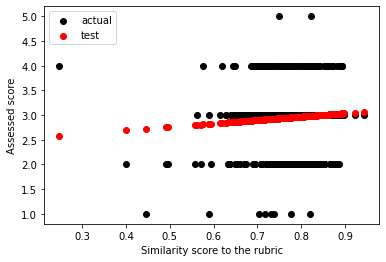

In [117]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


# Splitting the data into training and testing data

regr = LinearRegression()

regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)



print("Predicted Output Values")
print(y_pred[:10])

# Plot outputs
plt.scatter(X_test, y_test, color='black',label='actual')
plt.xlabel('Similarity score to the rubric')
plt.ylabel('Assessed score')
plt.scatter(X_test, y_pred, color='red', linewidth=1, label='test')
plt.legend()

plt.show()